In [162]:
import pandas as pd

# Load data from df_ipd_cm.csv
df_cases = pd.read_csv('https://raw.githubusercontent.com/rittiin/healthdata/main/df_ipd_cm.csv', parse_dates=['date'], index_col='date')

# Load data from dust_cm.csv
df_pm = pd.read_csv('https://raw.githubusercontent.com/rittiin/healthdata/main/dust_cm.csv', parse_dates=['date'], index_col='date')


/opt/anaconda3/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '31/01/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '28/02/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '31/03/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/parsers/base_parser.py:1070: UserWarning: Parsing '30/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
/opt/anaconda3/lib/python3.9

In [163]:
df = pd.merge(df_cases, df_pm, how='outer', left_index=True, right_index=True)

In [164]:
df

,cases,Value_pm
date,,
2018-01-31,319,28.45
2018-02-28,310,51.04
2018-03-31,282,72.98
2018-04-30,323,48.53
2018-05-31,313,19.74
...,...,...
2023-08-31,0,NaN
2023-09-30,0,NaN
2023-10-31,0,NaN


In [165]:
# Fill missing values with mean + sd
for col in df.columns:
    mean = df[col].mean()
    std = df[col].std()
    df[col].fillna(mean + std, inplace=True)

In [181]:
# Filter data from 2018 to 2022
df = df.loc['2018':'2022']
df1 = df


train = df['2018-01-31':'2021-12-31']
test = df['2022-01-31':'2022-12-31']

In [182]:
# หา  corr caase vs pm / vs pm lag1/ vs pm lag2 + scatter plot 
df1['pm_l1'] = df1['Value_pm'].shift(1)
df1['pm_l2'] = df1['Value_pm'].shift(2)
df = df.iloc[:,0:2]

In [168]:
from statsmodels.tsa.api import VAR

In [183]:
for i in range(1,13):
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  14.288788004769327
BIC:  14.524977060306782

Order = 2
AIC:  14.155118146132109
BIC:  14.552648884499304

Order = 3
AIC:  14.220147506217739
BIC:  14.78222028081295

Order = 4
AIC:  14.36072509810103
BIC:  15.090620857431228

Order = 5
AIC:  14.345725944762728
BIC:  15.246805073722225

Order = 6
AIC:  14.360312056598755
BIC:  15.43601229648846

Order = 7
AIC:  14.19015012224686
BIC:  15.443983341786598

Order = 8
AIC:  14.109600231320695
BIC:  15.54514776731754

Order = 9
AIC:  13.834411017402424
BIC:  15.455317236708233

Order = 10
AIC:  14.045628865429265
BIC:  15.855592515653166

Order = 11
AIC:  13.889180829154924
BIC:  15.891943639469364

Order = 12
AIC:  12.794115903675408
BIC:  14.993447762642226



/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self.

In [243]:
# Fit VAR model
model = VAR(df)
results = model.fit(1)



/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [244]:
# View summary statistics of the model
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 05, Apr, 2023
Time:                     09:15:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1931
Nobs:                     59.0000    HQIC:                   14.0643
Log likelihood:          -573.899    FPE:                1.18118e+06
AIC:                      13.9818    Det(Omega_mle):     1.06964e+06
--------------------------------------------------------------------
Results for equation cases
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const             225.382532        37.812608            5.961           0.000
L1.cases            0.177124         0.133544            1.326           0.185
L1.Value_pm         0.036822         0.461254            0.080      

In [245]:
lagged_Values = df.values[-5:]

pred = results.forecast(y=lagged_Values, steps=12) 


In [246]:
forecast = pred[0:,0]
forecast = pd.DataFrame(forecast)
test1 = test['cases']
df_error = pd.concat([test1,forecast], axis =1)
df_error[0] = df_error[0].shift(-12)
df_error = df_error[0:12]
df_error['error'] = df_error['cases'] - df_error[0]
df_error['abs_error'] = np.abs(df_error['error'])
df_error['sum_error'] = df_error['abs_error'].sum()
df_error['mean_abs_error'] = df_error['sum_error']/len(df_error['sum_error'])
df_error['mape_each'] = df_error['abs_error']/df_error['cases']*100
df_error['mape'] = df_error['mape_each'].sum()/len(df_error)
df_error

,cases,0,error,abs_error,sum_error,mean_abs_error,mape_each,mape
2022-01-31 00:00:00,305.0,273.533778,31.466222,31.466222,459.183021,38.265252,10.316794,15.123278
2022-02-28 00:00:00,252.0,274.859975,-22.859975,22.859975,459.183021,38.265252,9.071419,15.123278
2022-03-31 00:00:00,231.0,275.096727,-44.096727,44.096727,459.183021,38.265252,19.089492,15.123278
2022-04-30 00:00:00,197.0,275.141187,-78.141187,78.141187,459.183021,38.265252,39.665577,15.123278
2022-05-31 00:00:00,275.0,275.150978,-0.150978,0.150978,459.183021,38.265252,0.054901,15.123278
2022-06-30 00:00:00,221.0,275.154033,-54.154033,54.154033,459.183021,38.265252,24.504087,15.123278
2022-07-31 00:00:00,271.0,275.155465,-4.155465,4.155465,459.183021,38.265252,1.533382,15.123278
2022-08-31 00:00:00,305.0,275.156316,29.843684,29.843684,459.183021,38.265252,9.784814,15.123278
2022-09-30 00:00:00,211.0,275.156867,-64.156867,64.156867,459.183021,38.265252,30.406098,15.123278
2022-10-31 00:00:00,381.0,275.157232,105.842768,105.842768,459.183021,38.265252,27.780254,15.123278


In [238]:
import matplotlib.pyplot as plt


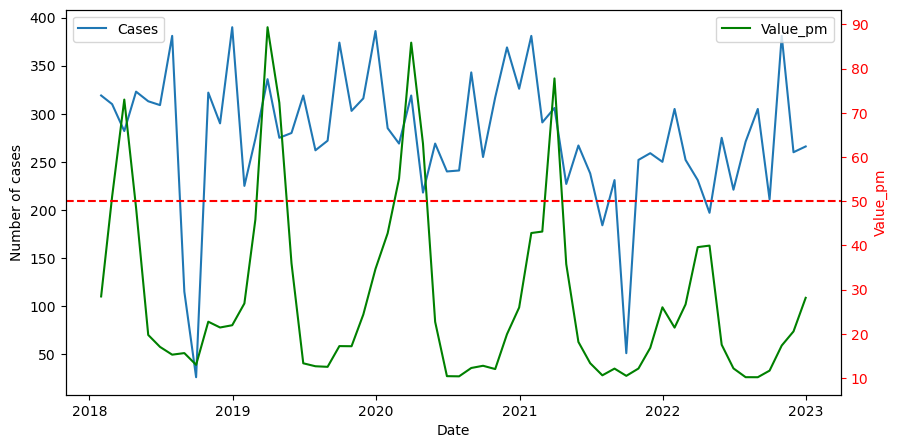

In [175]:
# Create time series plot
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
ax1.plot(df.index, df['cases'], label='Cases')
ax2.plot(df.index, df['Value_pm'], color='g', label='Value_pm')
ax2.axhline(y=50, color='r', linestyle='--')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of cases')
ax2.set_ylabel('Value_pm')
ax2.yaxis.label.set_color('r')
ax2.tick_params(axis='y', colors='r')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()